In [21]:
import numpy as np
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from architecture import EIT
from lenet import lenet

In [3]:
batchSize = 250
epochs = 1000
optimizer = "adam"
lossFunction = "mse"
patience = 20
earlyStop = EarlyStopping(monitor = "val_loss" ,patience = patience)

In [4]:
print("Importing dataset...")
inputData = np.load("../data/test/1366_seed_A_input.npy")
inputData = np.reshape(inputData, (len(inputData), 32, 32, 1))
outputData = np.load("../data/test/1366_seed_A_output.npy")
print(f"input Data: {inputData.shape}")
print(f"output Data: {outputData.shape}")

Importing dataset...
input Data: (10000, 32, 32, 1)
output Data: (10000, 1366)


In [5]:
xTrain, xTest, yTrain, yTest = train_test_split(inputData, outputData,
                                                test_size = 499)
print(f"xTrain: {xTrain.shape}")
print(f"yTrain: {yTrain.shape}")
print(f"xTest:  {xTest.shape}")
print(f"yTest:  {yTest.shape}")

xTrain: (9501, 32, 32, 1)
yTrain: (9501, 1366)
xTest:  (499, 32, 32, 1)
yTest:  (499, 1366)


In [6]:
model_eit = EIT().build(numberOfCondValues = 1366)
model_eit.compile(optimizer = optimizer,
              loss = lossFunction,
              metrics = ["mse"])
model_eit.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 60)        45060     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 60)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3840)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 355)               1363555   
_________________________________________________________________
dense_2 (Dense)              (None, 1366)             

In [7]:
history_eit = model_eit.fit(x = xTrain, y = yTrain,
                            validation_data = (xTest, yTest),
                            epochs = epochs,
                            batch_size = batchSize,
                            verbose = 1,
                            callbacks = [earlyStop])

Train on 9501 samples, validate on 499 samples
Epoch 1/1000
9501/9501 [==============================] - 10s 1ms/step - loss: 0.3995 - mse: 0.3995 - val_loss: 0.3235 - val_mse: 0.3235
Epoch 2/1000
9501/9501 [==============================] - 2s 226us/step - loss: 0.3202 - mse: 0.3202 - val_loss: 0.3177 - val_mse: 0.3177
Epoch 3/1000
9501/9501 [==============================] - 2s 227us/step - loss: 0.3141 - mse: 0.3141 - val_loss: 0.3132 - val_mse: 0.3132
Epoch 4/1000
9501/9501 [==============================] - 2s 226us/step - loss: 0.3118 - mse: 0.3118 - val_loss: 0.3101 - val_mse: 0.3101
Epoch 5/1000
9501/9501 [==============================] - 2s 226us/step - loss: 0.3049 - mse: 0.3049 - val_loss: 0.2951 - val_mse: 0.2951
Epoch 6/1000
9501/9501 [==============================] - 2s 225us/step - loss: 0.2851 - mse: 0.2851 - val_loss: 0.2753 - val_mse: 0.2753
Epoch 7/1000
9501/9501 [==============================] - 2s 226us/step - loss: 0.2584 - mse: 0.2584 - val_loss: 0.2387 - val_

9501/9501 [==============================] - 2s 259us/step - loss: 0.0997 - mse: 0.0997 - val_loss: 0.0996 - val_mse: 0.0996
Epoch 59/1000
9501/9501 [==============================] - 2s 255us/step - loss: 0.0997 - mse: 0.0997 - val_loss: 0.0996 - val_mse: 0.0996
Epoch 60/1000
9501/9501 [==============================] - 2s 256us/step - loss: 0.0997 - mse: 0.0997 - val_loss: 0.0996 - val_mse: 0.0996
Epoch 61/1000
9501/9501 [==============================] - 2s 258us/step - loss: 0.0997 - mse: 0.0997 - val_loss: 0.0996 - val_mse: 0.0996
Epoch 62/1000
9501/9501 [==============================] - 2s 258us/step - loss: 0.0998 - mse: 0.0998 - val_loss: 0.1007 - val_mse: 0.1007
Epoch 63/1000
9501/9501 [==============================] - 2s 260us/step - loss: 0.1005 - mse: 0.1005 - val_loss: 0.0992 - val_mse: 0.0992
Epoch 64/1000
9501/9501 [==============================] - 2s 261us/step - loss: 0.0990 - mse: 0.0990 - val_loss: 0.0989 - val_mse: 0.0989
Epoch 65/1000
9501/9501 [================

In [8]:
print("Importing validation data...")
xValidation = np.load("../data/1366_seed_A_input.npy")
xValidation = np.reshape(xValidation, (len(xValidation), 32, 32, 1))
yValidation = np.load("../data/1366_seed_A_output.npy")
print(f"input Validation Data:  {xValidation.shape}")
print(f"output Validation Data: {yValidation.shape}")

Importing validation data...
input Validation Data:  (10000, 32, 32, 1)
output Validation Data: (10000, 1366)


In [9]:
score = model_eit.evaluate(x = xValidation, y = yValidation)
print(f"{model_eit.metrics_names[0]}: {score[0]}")

10000/10000 [==============================] - 2s 181us/step
loss: 0.0992245996952057


In [10]:
print("Saving model...", end = " ")
model_eit.save("eit.h5")
print("Done")

del model

Saving model... Done


In [20]:
print(history.history.keys())

dict_keys(['val_loss', 'val_mse', 'loss', 'mse'])


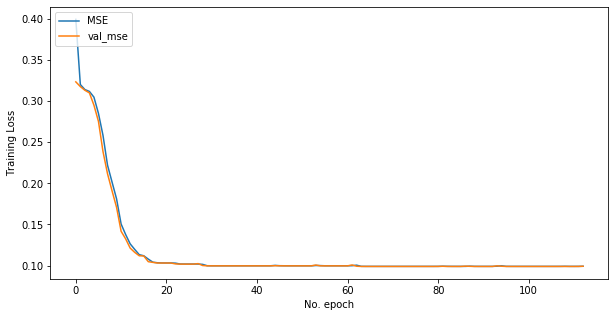

In [32]:
%matplotlib inline
plt.figure(figsize = (10,5))
plt.plot(history.history['mse'], label = "MSE")
plt.plot(history.history['val_mse'], label = "val_mse")
plt.ylabel("Training Loss")
plt.xlabel("No. epoch")
plt.legend(loc="upper left")
plt.show()